# 1.Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 2. Import Data 

In [2]:
Fraud_check=pd.read_csv('Fraud_check.csv')
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 3.Data Understanding 

In [3]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
Fraud_check.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
Fraud_check=pd.get_dummies(Fraud_check,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [6]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
Fraud_check["Taxinc"]= pd.cut(Fraud_check["Taxable.Income"],bins=[10002,30000,99620],labels=['Risky','Good'])
Fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


## Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [7]:
#After creation of new col. Taxable_Income_val also made its dummies var concating right side of df
Fraud_check=pd.get_dummies(Fraud_check,columns=["Taxinc"],drop_first=True)

In [8]:
Fraud_check.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


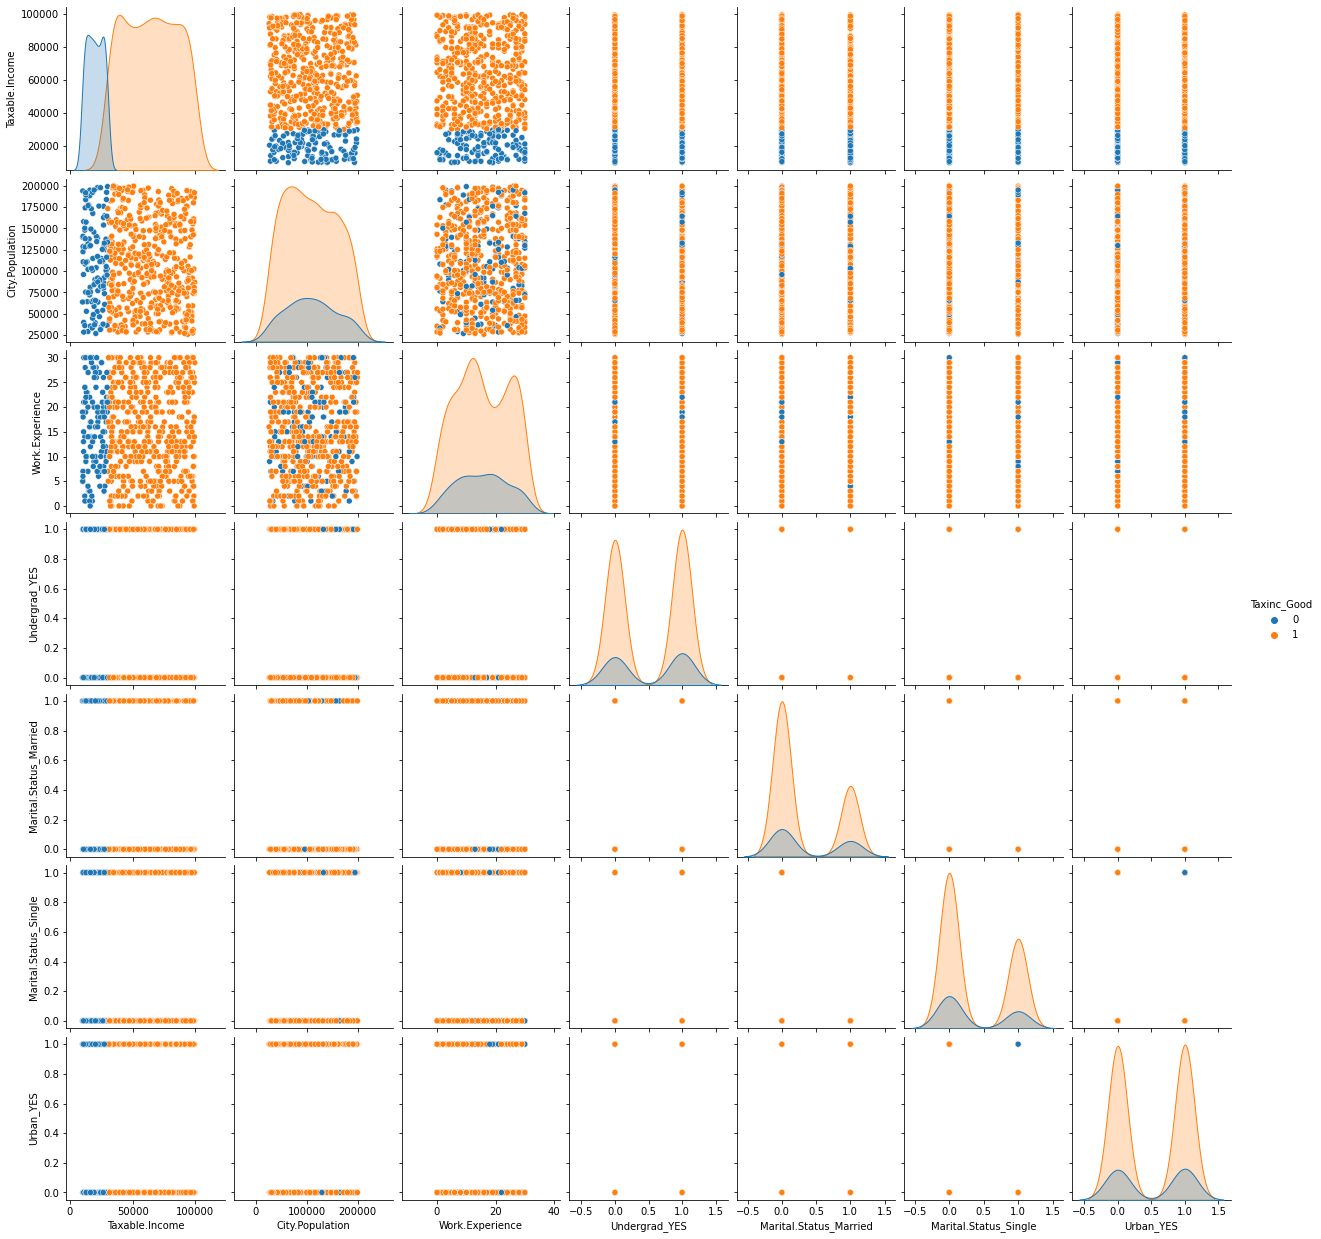

In [9]:
import seaborn as sns
sns.pairplot(data=Fraud_check,hue='Taxinc_Good')

In [10]:
#Data isn't Normally Distribute hence,we are using Normalization Function

In [11]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
# Normalized data frame (considering the numerical part of data)
df_norm=norm_func(Fraud_check.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [13]:
# Declaring Features & target
X=df_norm.drop(['Taxinc_Good'],axis=1)
y=df_norm['Taxinc_Good']

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.20,random_state=0)

In [15]:
X_train.shape,y_train.shape

((480, 6), (480,))

In [16]:
X_test.shape,y_test.shape

((120, 6), (120,))

# Decision Tree with Gini Criteria

In [17]:
from sklearn.tree import DecisionTreeClassifier
Clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [18]:
Clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_predict_gini=Clf_gini.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_gini)

0.7833333333333333

In [21]:
y_Train_predict_gini=Clf_gini.predict(X_train)
y_Train_predict_gini

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
accuracy_score(y_train,y_Train_predict_gini)

0.8

#  Check for overfitting and underfitting 

In [23]:
accuracy_score(y_test,y_predict_gini),accuracy_score(y_train,y_Train_predict_gini)

(0.7833333333333333, 0.8)

### Here, the training-set accuracy score is 0.8 while the test-set accuracy to be 0.7833.
### These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-trees

[Text(0.5416666666666666, 0.875, 'X[1] <= 0.817\ngini = 0.327\nsamples = 480\nvalue = [99, 381]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 0.988\ngini = 0.349\nsamples = 373\nvalue = [84, 289]'),
 Text(0.16666666666666666, 0.375, 'X[1] <= 0.483\ngini = 0.343\nsamples = 369\nvalue = [81, 288]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.3\nsamples = 239\nvalue = [44, 195]'),
 Text(0.25, 0.125, 'gini = 0.407\nsamples = 130\nvalue = [37, 93]'),
 Text(0.5, 0.375, 'X[1] <= 0.483\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[1] <= 0.85\ngini = 0.241\nsamples = 107\nvalue = [15, 92]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 0.228\ngini = 0.268\nsamples = 94\nvalue = [15, 79]'),
 Text(0.75, 0.125, 'gini = 0.147\nsamples = 25\nvalue = [2

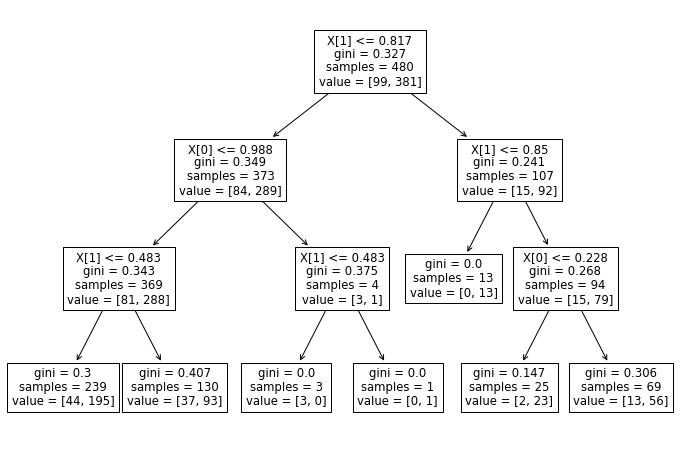

In [24]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(Clf_gini.fit(X_train,y_train))

##  visualizing the DT with Graphiz 
 

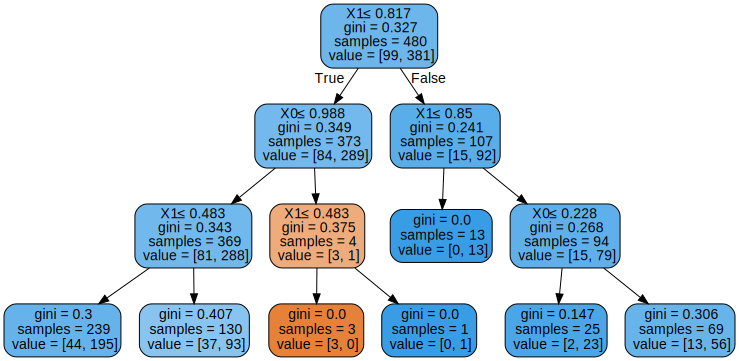

In [25]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
dot_data=tree.export_graphviz(Clf_gini,out_file=None,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

# Decision Tree classifier with criterian entropy 

In [26]:
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Predict the Test results with criterion entropy # 

In [27]:
y_predict_en=clf_en.predict(X_test)

## Checking accuracy score with criterion entropy 

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_en)

0.7833333333333333

##  Comparing the Train set & Test set accuracy 

 ### Now,i'll compare the train set & Test set accuracy score to check for overfitting

In [29]:
y_predict_Train_en=clf_en.predict(X_train)
y_predict_Train_en

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [30]:
accuracy_score(y_train,y_predict_Train_en)

0.8

In [31]:
clf_en.score(X_train,y_train),clf_en.score(X_test,y_test)

(0.8, 0.7833333333333333)

### We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8 while the test-set accuracy to be 0.7833. These two values are quite comparable. So, there is no sign of overfitting. 

## Visualizing Decesion Tree  

[Text(0.5416666666666666, 0.875, 'X[1] <= 0.817\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 0.988\nentropy = 0.77\nsamples = 373\nvalue = [84, 289]'),
 Text(0.16666666666666666, 0.375, 'X[1] <= 0.483\nentropy = 0.759\nsamples = 369\nvalue = [81, 288]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.689\nsamples = 239\nvalue = [44, 195]'),
 Text(0.25, 0.125, 'entropy = 0.862\nsamples = 130\nvalue = [37, 93]'),
 Text(0.5, 0.375, 'X[1] <= 0.483\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[1] <= 0.85\nentropy = 0.585\nsamples = 107\nvalue = [15, 92]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 0.049\nentropy = 0.633\nsamples = 94\nvalue = [15, 79]'),
 Text(0.75, 0.125, 'entr

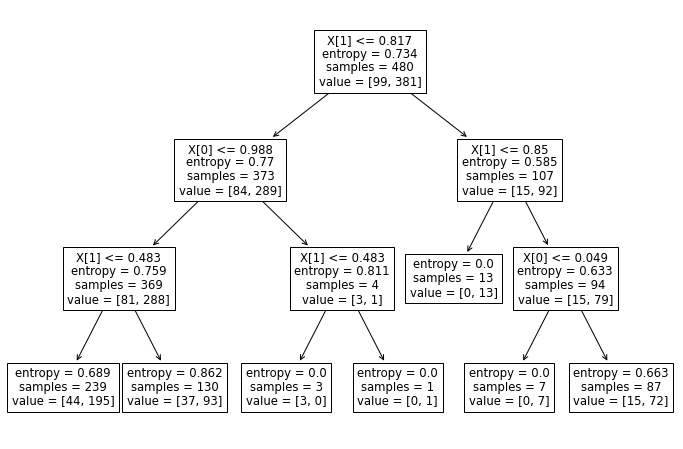

In [32]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train,y_train))

## Visualizing Decision Tree

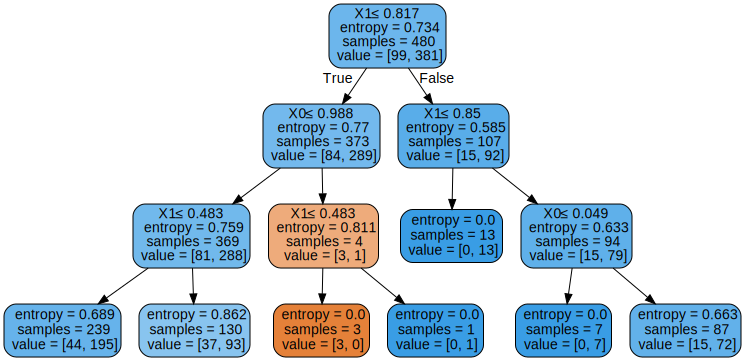

In [33]:
dot_data=tree.export_graphviz(clf_en,out_file=None,filled=True,
                              rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

# Conclusion 

In [34]:
#From the above we can concluded that our classification model accuracy is very good.
#our model is doing a very good job in terms of predicting the class labels.

### But,it doesn't give the underlying distribution of values.Also,it doesn't tell anything about the type of errors our classifier is making hence for that purpose i'm using Confusion Matrix.

# Confusion Matrix


### A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category.

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_en)
cm

array([[ 0, 25],
       [ 1, 94]], dtype=int64)

# Classification Report


### Classification report is another way to evaluate the classification model performance. 

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_en))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        25
         1.0       0.79      0.99      0.88        95

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



# Results & My Conclusion Report 


### 
1.In This assignment i build two models one with criterion gini index and another one with criterion entropy.

2.In the model with criterion gini index,the training-set accuracy score is 0.80 while the test-set accuracy to be 0.7833.These two values are quite comparable. So, there is no sign of overfitting.

3.Similarly,in the model with criterion entropy, the training-set accuracy score is 0.80 while the test-set accuracy to be 0.7833.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

4.The confusion matrix and classification report yields very good model performance.
 